In [58]:
from data_fun import *

In [3]:
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import spotipy 
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


import pathlib
import os
import yaml

import pandas as pd 

from dotenv import load_dotenv
load_dotenv()

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
with open("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/spotify_details.yml", 'r') as stream:
    spotify_details = yaml.safe_load(stream)

In [44]:
scope = "user-library-read user-follow-read user-top-read playlist-read-private"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=spotify_details['client_id'],
    client_secret=spotify_details['client_secret'],
    redirect_uri=spotify_details['redirect_uri'],
    scope=scope
))

In [42]:
# scope = "user-library-read user-follow-read user-top-read playlist-read-private playlist-modify-public user-top-read user-read-recently-played"
# client_id = os.getenv('client_id')
# client_secret = os.getenv('client_secret')
# redirect_uri = "http://localhost:8080/callback"

In [116]:
# Client ID and Client Secret are set as env variables
# The OAuth authentication manager is used to handle user authentication with the Spotify API. It handles the OAuth 2.0 authentication flow, which involves requesting 
# permission from the user to access their Spotify account and then exchanging an authorization code for an access token. The access token is used to authenticate 
# requests to the Spotify API.

import spotipy
from spotipy.oauth2 import SpotifyOAuth

OAuth = SpotifyOAuth(scope=scope,
                     redirect_uri=redirect_uri,
                    
                     client_id=client_id,
                     client_secret=client_secret)

                     
token = OAuth.get_access_token()

# receive the following warning
# __main__:1: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future 
#  versions. Please adjust your code accordingly, or use get_cached_token instead.
# At this point, I am taken to the user authorization and grant access with the 'user-top-read' scope

# creating an instance of the Spotify class 
# the Spotify class is the main class in the Spotipy library and provides access to the Spotify Web API. It allows you to make requests to the Spotify API 
# and receive responses in a Pythonic way.
# By passing the OAuth authentication manager to the auth_manager argument of the Spotify constructor, you are telling Spotipy to use this authentication manager 
# to authenticate requests made through the Spotify instance sp.
sp = spotipy.Spotify(auth_manager=OAuth)
# get the current user’s top tracks
# outputs JSON data containing all of the information about this playlist
top_tracks = sp.current_user_top_tracks() # 140 słowników
top_tracks



C:\Users\Daria\AppData\Local\Temp\ipykernel_12656\591758908.py:16: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token = OAuth.get_access_token()


{'items': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JP',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',
     'NZ',
     'PA',
     'PE',
     'PH',
     'PL',
     'PT',
     'P

In [127]:
top_tracks = sp.current_user_top_tracks() # 140 słowników


In [46]:
print("top artist data: ")
top_artists = offset_api_limit(sp, sp.current_user_top_artists())
top_artists_df = get_artists_df(top_artists)
top_artists_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/top_artists.pkl")

print("followed artist data: ")
followed_artists = offset_api_limit(sp, sp.current_user_followed_artists())
followed_artists_df = get_artists_df(followed_artists)
followed_artists_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/followed_artists.pkl")


print("top track data: ")
top_tracks = offset_api_limit(sp, sp.current_user_top_tracks())
top_tracks_df = get_tracks_df(top_tracks)
top_tracks_df = get_track_audio_df(sp, top_tracks_df)
top_tracks_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/top_tracks.pkl")


print("saved track data: ")
saved_tracks = offset_api_limit(sp, sp.current_user_saved_tracks())
saved_tracks_df = get_tracks_df(saved_tracks)
saved_tracks_df = get_track_audio_df(sp, saved_tracks_df)
saved_tracks_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/saved_tracks.pkl")



# print("Getting, transforming, and saving tracks recommendations...")
# # Define a sample playlists to yield tracks to get recommendations for, 20 recommendations per track
# recommendation_tracks = get_recommendations(sp, playlist_tracks_df[playlist_tracks_df['playlist_name'].isin(
#     ["Chill", "Chill '20", "Chill '19", "Chill '18", "Your Top Songs 2020", "Your Top Songs 2019", "Your Top Songs 2018"
#      ])].drop_duplicates(subset='id', keep="first")['id'].tolist())
# recommendation_tracks_df = get_tracks_df(recommendation_tracks)
# recommendation_tracks_df = get_track_audio_df(sp, recommendation_tracks_df)
# recommendation_tracks_df.to_pickle("spotify/recommendation_tracks.pkl")


top artist data: 
followed artist data: 
top track data: 


c:\Users\Daria\OneDrive\Pulpit\spotify_project\Spotify-project\data_fun.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('audio_features', 1).assign(**df['audio_features'].apply(pd.Series))


saved track data: 


c:\Users\Daria\OneDrive\Pulpit\spotify_project\Spotify-project\data_fun.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tracks_df = tracks_df.drop('track', 1).assign(**tracks_df['track'].apply(pd.Series))
c:\Users\Daria\OneDrive\Pulpit\spotify_project\Spotify-project\data_fun.py:78: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('audio_features', 1).assign(**df['audio_features'].apply(pd.Series))


In [91]:
def get_all_playlist_tracks_df(sp, sp_call):
    """
    Get all (non-limited) tracks from a Spotify playlist API call
    :param sp:
    :param sp_call:
    :param sp: Spotify OAuth
    :param sp_call: API function all
    :return: list of tracks
    """
    playlists = sp_call
    # print(playlists)
    playlist_data, data = playlists['items'], []
    # print(playlist_data)
    playlist_ids, playlist_names, playlist_tracks = [], [], []
    for playlist in playlist_data:
        for i in range(playlist['tracks']['total']):
            playlist_ids.append(playlist['id'])
            playlist_names.append(playlist['name'])
            playlist_tracks.append(playlist['tracks']['total'])

        saved_tracks = sp.playlist(playlist['id'], fields="tracks, next")
        results = saved_tracks['tracks']
        data.extend(results['items'])
        while results['next']:
            results = sp.next(results)
            data.extend(results['items'])
    tracks_df = pd.DataFrame(data)
    # Playlists
    tracks_df['playlist_id'] = playlist_ids
    tracks_df['playlist_name'] = playlist_names
    tracks_df['playlist_tracks'] = playlist_tracks
    # Dataframe manipulation
    tracks_df = tracks_df[tracks_df['is_local'] == False]  # remove local tracks (no audio data)
    tracks_df = tracks_df.drop('track', 1).assign(**tracks_df['track'].apply(pd.Series))
    # Album
    tracks_df['album_id'] = tracks_df['album'].apply(lambda x: x['id'])
    tracks_df['album_name'] = tracks_df['album'].apply(lambda x: x['name'])
    tracks_df['album_release_date'] = tracks_df['album'].apply(lambda x: x['release_date'])
    tracks_df['album_tracks'] = tracks_df['album'].apply(lambda x: x['total_tracks'])
    tracks_df['album_type'] = tracks_df['album'].apply(lambda x: x['type'])
    # Album Artist
    tracks_df['album_artist_id'] = tracks_df['album'].apply(lambda x: x['artists'][0]['id'])
    tracks_df['album_artist_name'] = tracks_df['album'].apply(lambda x: x['artists'][0]['name'])
    # Artist
    tracks_df['artist_id'] = tracks_df['artists'].apply(lambda x: x[0]['id'])
    tracks_df['artist_name'] = tracks_df['artists'].apply(lambda x: x[0]['name'])
    # playlist_tracks has ['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail']
    select_columns = ['id', 'name', 'popularity', 'type', 'is_local', 'explicit', 'duration_ms', 'disc_number',
                      'track_number',
                      'artist_id', 'artist_name', 'album_artist_id', 'album_artist_name',
                      'album_id', 'album_name', 'album_release_date', 'album_tracks', 'album_type',
                      'playlist_id', 'playlist_name', 'playlist_tracks',
                      'added_at', 'added_by']
    return tracks_df[select_columns]



In [94]:
print("Getting, transforming, and saving playlist track data...")
playlists = sp.current_user_playlists()
playlist_tracks_df = get_all_playlist_tracks_df(sp, playlists)  # limit of 50 playlists by default
# Create yaml dump
playlist_dict = dict(zip(playlist_tracks_df['playlist_name'], playlist_tracks_df['playlist_id']))
with open('C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/playlists.yml', 'w') as outfile:
    yaml.dump(playlist_dict, outfile, default_flow_style=False)




Getting, transforming, and saving playlist track data...


C:\Users\Daria\AppData\Local\Temp\ipykernel_18332\1208067107.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tracks_df = tracks_df.drop('track', 1).assign(**tracks_df['track'].apply(pd.Series))


In [40]:
print(playlist_tracks_df.columns)


Index(['id', 'name', 'popularity', 'type', 'is_local', 'explicit',
       'duration_ms', 'disc_number', 'track_number', 'artist_id',
       'artist_name', 'album_artist_id', 'album_artist_name', 'album_id',
       'album_name', 'album_release_date', 'album_tracks', 'album_type',
       'playlist_id', 'playlist_name', 'playlist_tracks', 'added_at',
       'added_by'],
      dtype='object')


In [48]:
playlist_tracks_df = get_track_audio_df(sp, playlist_tracks_df)
print(playlist_tracks_df)
# playlist_tracks_df.to_pickle("C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/playlist_tracks.pkl")
# # Create yaml dump
# playlist_dict = dict(zip(playlist_tracks_df['playlist_name'], playlist_tracks_df['playlist_id']))
# with open('C:/Users/Daria/OneDrive/Pulpit/spotify_project/Spotify-project/playlists.yml', 'w') as outfile:
#     yaml.dump(playlist_dict, outfile, default_flow_style=False)

HTTP Error for GET to https://api.spotify.com/v1/artists/63P6mjkyXIyJkWj8a6yLwO with Params: {} returned 404 due to non existing id


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/artists/63P6mjkyXIyJkWj8a6yLwO:
 non existing id, reason: None

In [74]:
# tracks_df = pd.DataFrame(ite)
# tracks_df['album_id'] = tracks_df['album'].apply(lambda x: x['id'])
# tracks_df['album_name'] = tracks_df['album'].apply(lambda x: x['name'])
# tracks_df['album_release_date'] = tracks_df['album'].apply(lambda x: x['release_date'])
# tracks_df['album_tracks'] = tracks_df['album'].apply(lambda x: x['total_tracks'])
# tracks_df['album_type'] = tracks_df['album'].apply(lambda x: x['type'])

# # Album Artist
# tracks_df['album_artist_id'] = tracks_df['album'].apply(lambda x: x['artists'][0]['id'])
# tracks_df['album_artist_name'] = tracks_df['album'].apply(lambda x: x['artists'][0]['name'])
# # Artist
# tracks_df['artist_id'] = tracks_df['artists'].apply(lambda x: x[0]['id'])
# tracks_df['artist_name'] = tracks_df['artists'].apply(lambda x: x[0]['name'])

# # select_columns = ['id', 'name', 'popularity', 'type', 'is_local', 'explicit', 'duration_ms', 'disc_number',
# #                     'track_number',
# #                     'artist_id', 'artist_name', 'album_artist_id', 'album_artist_name',
# #                     'album_id', 'album_name', 'album_release_date', 'album_tracks', 'album_type']


# tracks_df['genres'] = tracks_df['artist_id'].apply(lambda x: sp.artist(x)['genres'])
# tracks_df['album_genres'] = tracks_df['album_artist_id'].apply(lambda x: sp.artist(x)['genres'])
# # Audio features
# tracks_df['audio_features'] = tracks_df['id'].apply(lambda x: sp.audio_features(x))
# tracks_df['audio_features'] = tracks_df['audio_features'].apply(pd.Series)
# tracks_df = tracks_df.drop('audio_features', 1).assign(**tracks_df['audio_features'].apply(pd.Series))
# # Don't need sp.audio_analysis(track_id) audio analysis for this project

# print(tracks_df.columns)


In [75]:
# the most listened songs
print(saved_tracks_df.columns)
# song_count  = df['name'].value_counts()
# song_count = song_count[:10,]
# plt.figure(figsize=(15,5))
# chart = sns.barplot(song_count.index, song_count.values, alpha=0.8)
# plt.title('Top 10 Songs All Time')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('Song', fontsize=12)
# xticks=chart.xaxis.get_major_ticks()
# chart.set_xticklabels(song_count.index, rotation=30)

# plt.show()

Index(['id', 'name', 'popularity', 'type', 'is_local', 'explicit',
       'duration_ms', 'disc_number', 'track_number', 'artist_id',
       'artist_name', 'album_artist_id', 'album_artist_name', 'album_id',
       'album_name', 'album_release_date', 'album_tracks', 'album_type',
       'added_at', 'genres', 'album_genres', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'uri', 'track_href', 'analysis_url',
       'time_signature'],
      dtype='object')


<AxesSubplot:xlabel='danceability', ylabel='Count'>

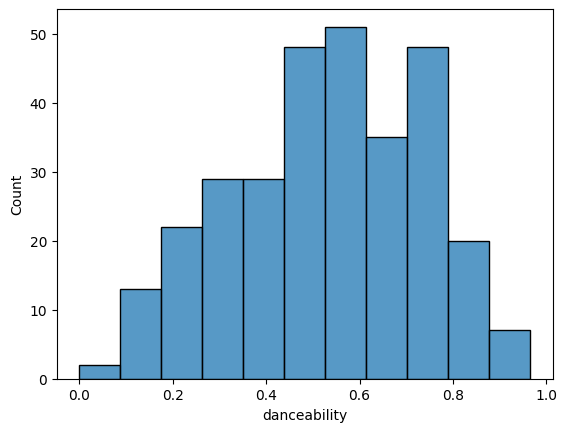

In [79]:
#Visualisation of Variability for each column in the dataframe
# fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.histplot(saved_tracks_df['danceability'])
# sns.distplot(df['year'],ax=ax[0,1])
# sns.distplot(df['acousticness'],ax=ax[0,2])
# sns.distplot(df['danceability'],ax=ax[0,3])
# #sns.distplot(df['duration_min'],ax=ax[1,1])
# sns.distplot(df['energy'],ax=ax[1,0])
# sns.distplot(df['key'],ax=ax[1,1])
# sns.distplot(df['liveness'],ax=ax[1,2])
# sns.distplot(df['loudness'],ax=ax[1,3])
# sns.distplot(df['popularity'],ax=ax[2,0])
# sns.distplot(df['speechiness'],ax=ax[2,1])
# sns.distplot(df['tempo'],ax=ax[2,2])
# sns.distplot(df['mode'],ax=ax[2,3])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

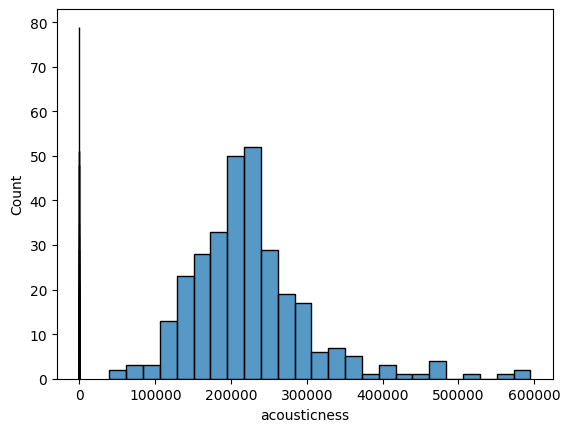

In [82]:
# columns = ['acousticness','danceability', 'duration_ms', 'energy', 'explicit',
#        'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
#        'popularity', 'speechiness', 'tempo', 'valence']
# for col in columns:
#        sns.histplot(saved_tracks_df[col])

#     y = top_tracks_df.groupby('year')[col].mean()
#     x = y.index
#     plt.figure(figsize=(15, 5))
#     sns.set_style("darkgrid")
#     sns.lineplot(x, y, data=top_tracks_df)